<a href="https://colab.research.google.com/github/dansojo/Medical_CV/blob/main/X_ray_CLAHE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**목표: CLAHE를 사용해 지역적 대비를 강화하여 작은 병변이 잘 드러나도록 조정.**

In [ ]:
import cv2
import matplotlib.pyplot as plt
from skimage import io

In [ ]:
# 원본 이미지 로드

image_path = '/content/drive/MyDrive/Medical_CV/X-ray/X-ray 이미지/normal_10.jpg'
xray_image = io.imread(image_path, as_gray=True)

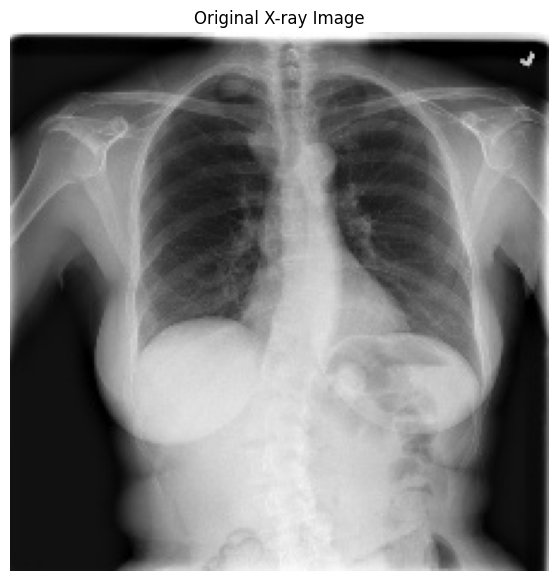

In [ ]:
# 원본 이미지 시각화

plt.figure(figsize=(7, 7))
plt.imshow(xray_image, cmap='gray')
plt.title("Original X-ray Image")
plt.axis('off')
plt.show()

In [ ]:
# CLAHE 적용

# clipLimit
# 대비 제한값을 설정하는 단계
# clipLimit=2.0을 많이 사용. 일반적으로 1.0 ~ 3.0 사이 값으로 설정하여 테스트 후 이미지가
# 과도하게 밝아지거나 어두워지면 값을 낮추는 식으로 진행

# tileGridSize
# CLAHE가 적용될 타일 크기를 설정하는 단계
# (8, 8)이 일반적인 기본값, 이미지를 8x8의 작은 타일로 나누어 처리한다.
# 값이 작을수록 ex) (4,4),(2,2) 국소적인 대비를 더 많이 조정한다. 이는 작은 병변 강조에 유리
# 값이 커지면 균형 잡힌 대비는 가능하지만 국소적인 디테일에는 불리하다.
# 일반적으로 (8,8) 에서 시작하고 (4,4) or (16,16) 등올 테스트 하면서 진행
# 2의 배수로 설정하면 이미지의 균형 잡힌 타일링과 처리 속도 최적화에서 약간의 이점이 있다


xray_image_uint8 = (xray_image * 255).astype('uint8')  # uint8 형식으로 변환
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))  # CLAHE 설정
clahe_image = clahe.apply(xray_image_uint8)

# 전처리 전후 이미지 비교


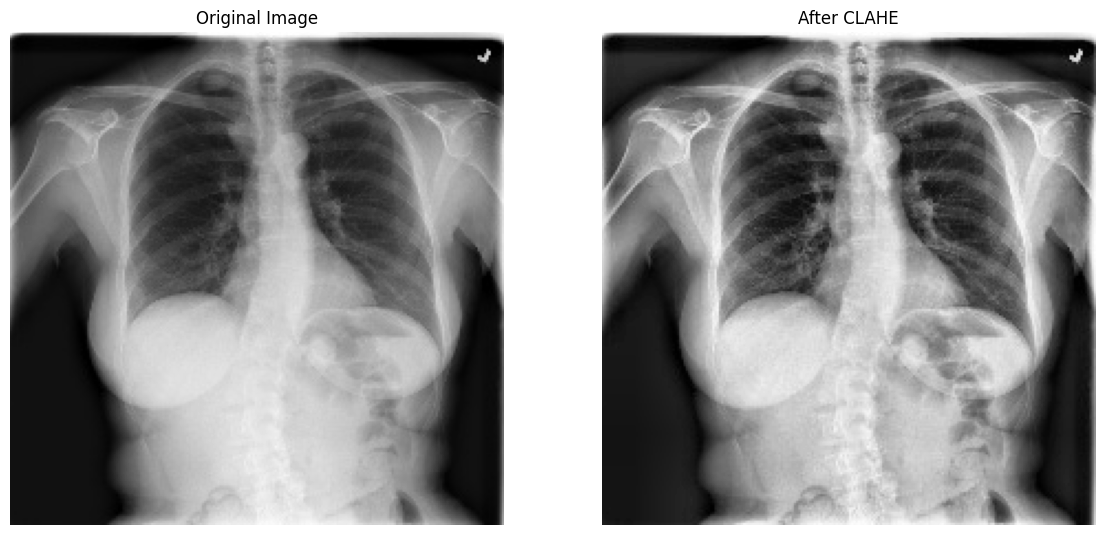

In [ ]:
plt.figure(figsize=(14, 7))

# 원본 이미지
plt.subplot(1, 2, 1)
plt.imshow(xray_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# CLAHE 적용 이미지
plt.subplot(1, 2, 2)
plt.imshow(clahe_image, cmap='gray')
plt.title("After CLAHE")
plt.axis('off')

plt.show()

# 전처리 전후 히스토그램 비교

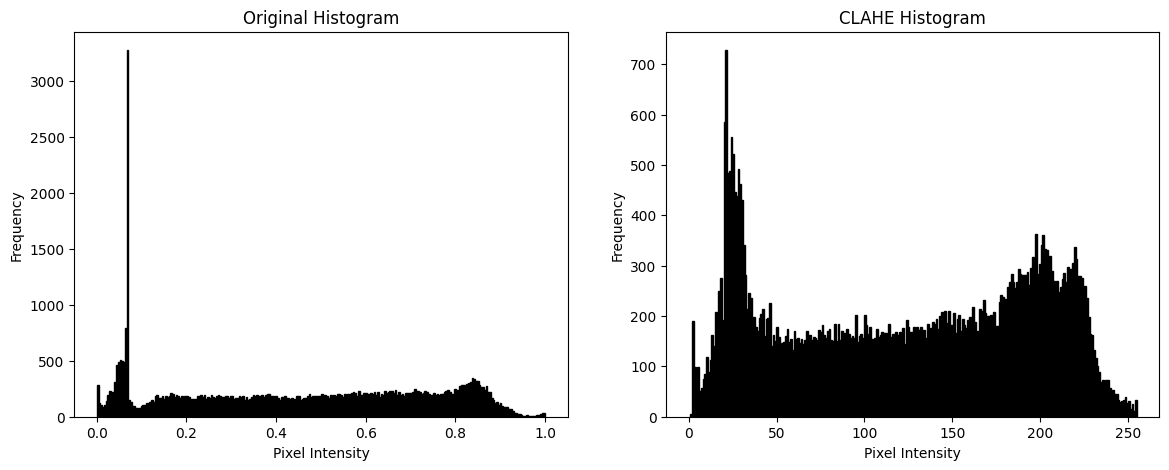

In [ ]:
plt.figure(figsize=(14, 5))

# 원본 히스토그램
plt.subplot(1, 2, 1)
plt.hist(xray_image.ravel(), bins=256, range=(0.0, 1.0), fc='black', ec='black')
plt.title("Original Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

# CLAHE 히스토그램
plt.subplot(1, 2, 2)
plt.hist(clahe_image.ravel(), bins=256, range=(0, 255), fc='black', ec='black')
plt.title("CLAHE Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.show()